In [2]:

def collect_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read().splitlines()
    return data

chat_data = collect_data('chat_data.txt')


In [3]:

chat_data

['User1: Hi, how are you?',
 "User2: I'm good, thanks. How about you?",
 "User1: I'm good too. What's up?",
 'User2: Not much, just got back from a meeting. You?',
 'User1: Same here. Just got back from a meeting too.',
 'User2: Cool. So, what did you think of the meeting?',
 'User1: It was okay, I guess. Nothing too exciting.',
 'User2: Yeah, I know what you mean. I felt the same way.',
 "User1: So, what's new with you? Any new projects coming up?",
 "User2: Actually, yes. We're launching a new product next quarter.",
 "User1: That sounds exciting! What's the product about?",
 "User2: It's a new software tool for data analysis. We're really excited about it.",
 "User1: That sounds cool. I'd love to learn more about it.",
 "User2: Definitely. I'll send you some info about it.",
 "User1: Thanks! I'd appreciate that.",
 'User2: No problem. Talk to you later!',
 'User1: Later!']

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def preprocess_data(data):
    processed_data = []
    for line in data:
        doc = nlp(line.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_data.append(' '.join(tokens))
    
    return processed_data

processed_chat_data = preprocess_data(chat_data)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sentiment Analysis (using Naive Bayes)
def sentiment_analysis(data, labels):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

sample_labels = [1 if 'good' in line else 0 for line in chat_data]

sentiment_analysis(processed_chat_data, sample_labels)

def topic_modeling(data, n_topics=5):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(data)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    
    for index, topic in enumerate(lda.components_):
        print(f"Topic {index+1}:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

topic_modeling(processed_chat_data)


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

Topic 1:
['sound', 'later', 'new', 'thank', 'good', 'exciting', 'product', 'cool', 'meeting']
Topic 2:
['sound', 'new', 'thank', 'good', 'meeting', 'exciting', 'product', 'cool', 'later']
Topic 3:
['later', 'new', 'thank', 'good', 'meeting', 'cool', 'product', 'exciting', 'sound']
Topic 4:
['sound', 'later', 'new', 'meeting', 'exciting', 'product', 'cool', 'good', 'thank']
Topic 5:
['sound', 'later', 'thank', 'good', 'meeting', 'exciting', 'cool', 'product', 'new']


c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

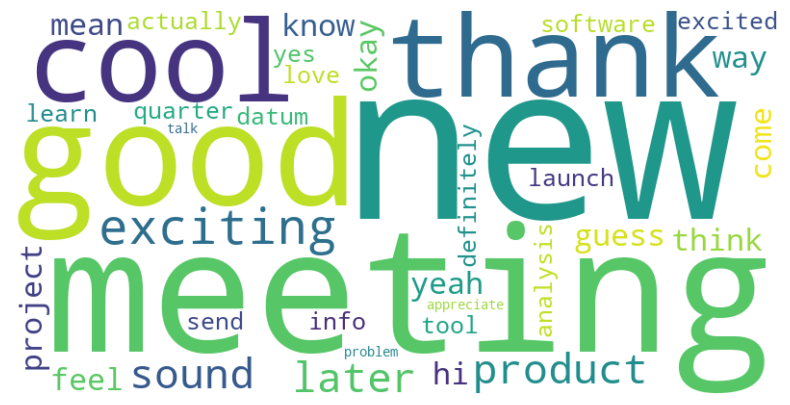

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud
def generate_wordcloud(data):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(processed_chat_data)




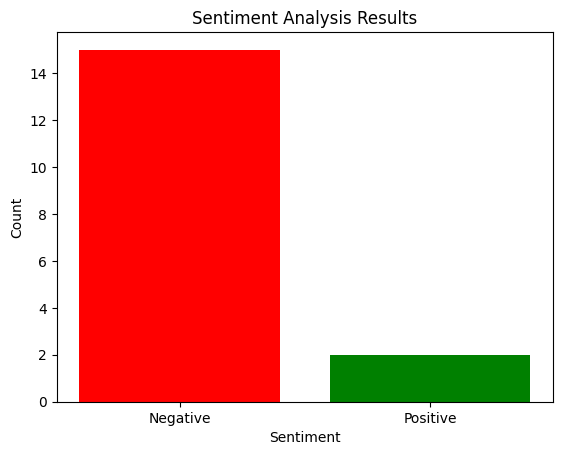

In [26]:
def sentiment_bar_chart(labels):
    plt.bar(['Negative', 'Positive'], [labels.count(0), labels.count(1)], color=['red', 'green'])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Analysis Results')
    plt.show()

sentiment_bar_chart(sample_labels)


In [28]:
# Keyword Extraction Using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_keywords(data, top_n=10):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(data)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    for i, document in enumerate(tfidf_matrix):
        tfidf_scores = dict(zip(feature_names, document.toarray()[0]))
        sorted_keywords = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
        print(f"Top {top_n} keywords in document {i+1}:")
        for keyword, score in sorted_keywords:
            print(f"{keyword}: {score:.3f}")
        print("\n")

# Extract keywords from the processed chat data
extract_keywords(processed_chat_data)


Top 10 keywords in document 1:
cool: 0.000
exciting: 0.000
good: 0.000
later: 0.000
meeting: 0.000
new: 0.000
product: 0.000
sound: 0.000
thank: 0.000


Top 10 keywords in document 2:
good: 0.707
thank: 0.707
cool: 0.000
exciting: 0.000
later: 0.000
meeting: 0.000
new: 0.000
product: 0.000
sound: 0.000


Top 10 keywords in document 3:
good: 1.000
cool: 0.000
exciting: 0.000
later: 0.000
meeting: 0.000
new: 0.000
product: 0.000
sound: 0.000
thank: 0.000


Top 10 keywords in document 4:
meeting: 1.000
cool: 0.000
exciting: 0.000
good: 0.000
later: 0.000
new: 0.000
product: 0.000
sound: 0.000
thank: 0.000


Top 10 keywords in document 5:
meeting: 1.000
cool: 0.000
exciting: 0.000
good: 0.000
later: 0.000
new: 0.000
product: 0.000
sound: 0.000
thank: 0.000


Top 10 keywords in document 6:
cool: 0.744
meeting: 0.668
exciting: 0.000
good: 0.000
later: 0.000
new: 0.000
product: 0.000
sound: 0.000
thank: 0.000


Top 10 keywords in document 7:
exciting: 1.000
cool: 0.000
good: 0.000
later: 0.00

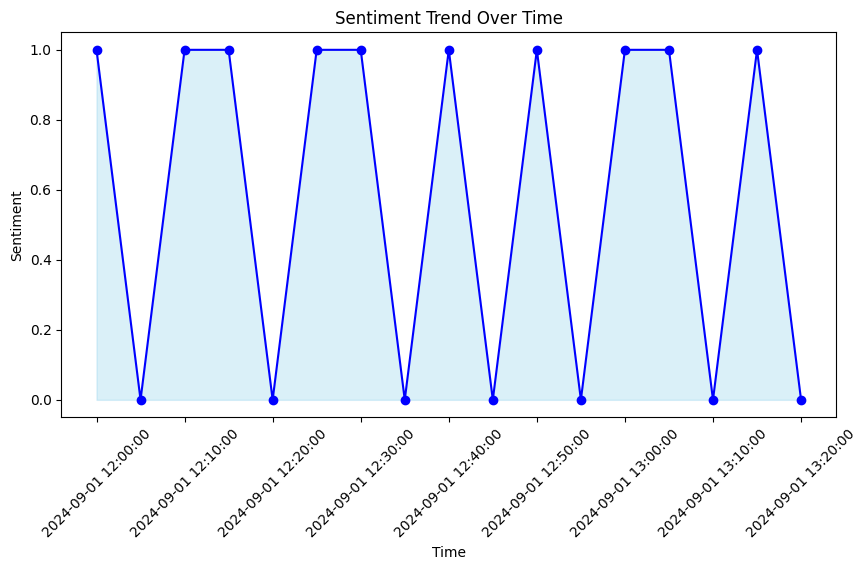

In [32]:
import matplotlib.dates as mdates
from datetime import datetime

def sentiment_trend_over_time(chat_data, sentiment_labels, timestamps):
    if len(timestamps) != len(sentiment_labels):
        print("Error: The number of timestamps and sentiment labels must match.")
        return
    
    dates = [datetime.strptime(ts, "%Y-%m-%d %H:%M:%S") for ts in timestamps]
    
    plt.figure(figsize=(10, 5))
    plt.plot(dates, sentiment_labels, marker='o', linestyle='-', color='blue')
    plt.fill_between(dates, sentiment_labels, color='skyblue', alpha=0.3)
    plt.xlabel('Time')
    plt.ylabel('Sentiment')
    plt.title('Sentiment Trend Over Time')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.show()

timestamps = [
    '2024-09-01 12:00:00', '2024-09-01 12:05:00', '2024-09-01 12:10:00',
    '2024-09-01 12:15:00', '2024-09-01 12:20:00', '2024-09-01 12:25:00',
    '2024-09-01 12:30:00', '2024-09-01 12:35:00', '2024-09-01 12:40:00',
    '2024-09-01 12:45:00', '2024-09-01 12:50:00', '2024-09-01 12:55:00',
    '2024-09-01 13:00:00', '2024-09-01 13:05:00', '2024-09-01 13:10:00',
    '2024-09-01 13:15:00', '2024-09-01 13:20:00'
]

sample_labels = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

# Visualize sentiment trend over time
sentiment_trend_over_time(processed_chat_data, sample_labels, timestamps)


In [30]:
# Topic Distribution Across Documents
import numpy as np

def topic_distribution(data, n_topics=5):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(data)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    
    topic_distribution = lda.transform(dtm)
    for i, doc_distribution in enumerate(topic_distribution):
        print(f"Document {i+1} topic distribution:")
        print({f"Topic {j+1}": doc_distribution[j] for j in range(n_topics)})
        print("\n")

topic_distribution(processed_chat_data)


Document 1 topic distribution:
{'Topic 1': 0.2, 'Topic 2': 0.2, 'Topic 3': 0.2, 'Topic 4': 0.2, 'Topic 5': 0.2}


Document 2 topic distribution:
{'Topic 1': 0.06667238853654155, 'Topic 2': 0.06667584615330277, 'Topic 3': 0.06667082532344668, 'Topic 4': 0.7333094561927583, 'Topic 5': 0.06667148379395081}


Document 3 topic distribution:
{'Topic 1': 0.10000987497914338, 'Topic 2': 0.10001584205164009, 'Topic 3': 0.10000717711201032, 'Topic 4': 0.599958792322613, 'Topic 5': 0.10000831353459337}


Document 4 topic distribution:
{'Topic 1': 0.5999738357318705, 'Topic 2': 0.10001005673308878, 'Topic 3': 0.10000455692762442, 'Topic 4': 0.10000627227616078, 'Topic 5': 0.10000527833125547}


Document 5 topic distribution:
{'Topic 1': 0.5999738357318705, 'Topic 2': 0.10001005673308878, 'Topic 3': 0.10000455692762442, 'Topic 4': 0.10000627227616078, 'Topic 5': 0.10000527833125547}


Document 6 topic distribution:
{'Topic 1': 0.7325387540845869, 'Topic 2': 0.06668012599330728, 'Topic 3': 0.0674323

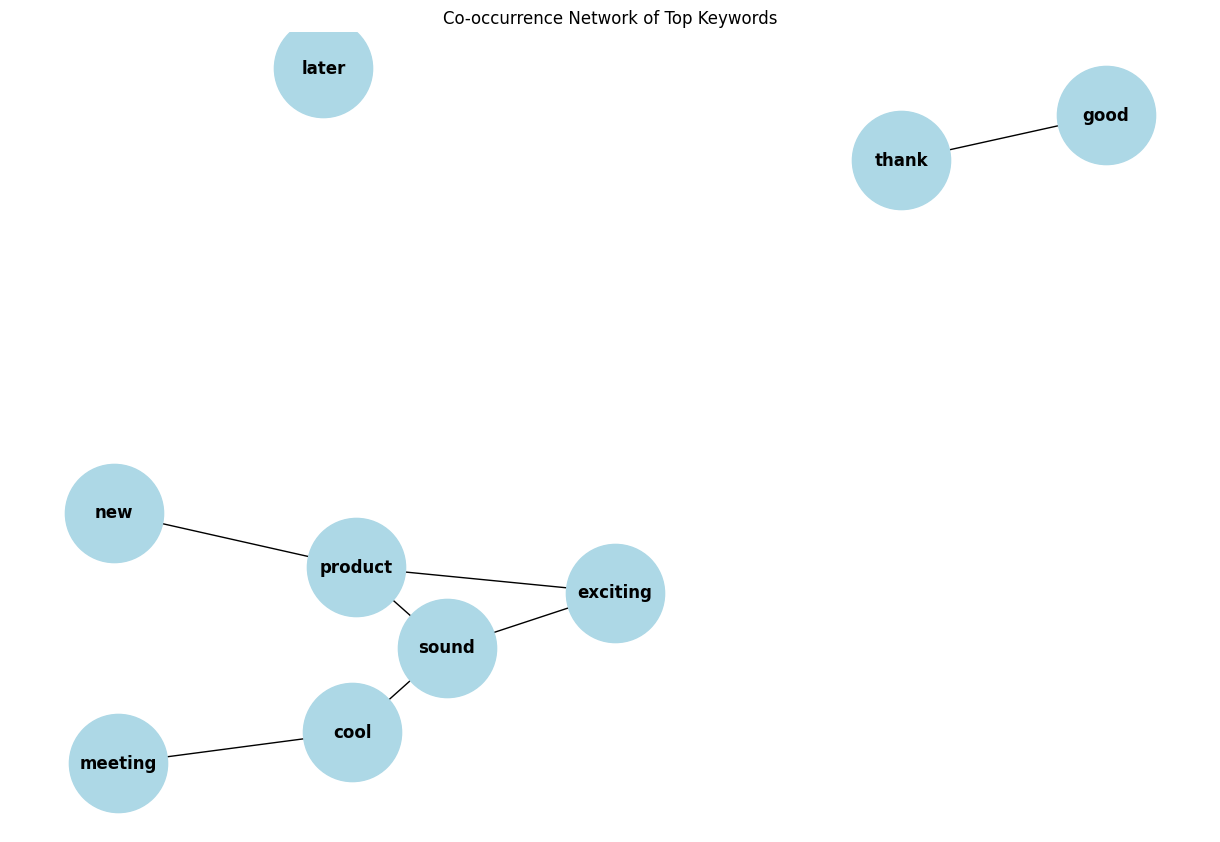

In [33]:
# Co-occurrence Network of Keywords
import networkx as nx
from itertools import combinations

def create_cooccurrence_network(data, top_n=20):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(data)
    feature_names = vectorizer.get_feature_names_out()
    
    term_counts = np.asarray(dtm.sum(axis=0)).ravel().tolist()
    term_freq = dict(zip(feature_names, term_counts))
    
    top_terms = sorted(term_freq, key=term_freq.get, reverse=True)[:top_n]
    top_indices = [feature_names.tolist().index(term) for term in top_terms]
    
    cooccurrence_matrix = (dtm[:, top_indices].T * dtm[:, top_indices]).toarray()
    
    G = nx.Graph()
    for i, term in enumerate(top_terms):
        G.add_node(term)
    
    for i, j in combinations(range(len(top_terms)), 2):
        if cooccurrence_matrix[i, j] > 0:
            G.add_edge(top_terms[i], top_terms[j], weight=cooccurrence_matrix[i, j])
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12, font_weight='bold')
    plt.title("Co-occurrence Network of Top Keywords")
    plt.show()

create_cooccurrence_network(processed_chat_data)
